<a href="https://colab.research.google.com/github/Yamini-code/project/blob/main/spam_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [4]:
file_path = 'mail_data.csv'
data = pd.read_csv(file_path)

In [5]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
data.columns=['label','mail']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   mail    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
data.shape

(5572, 2)

In [7]:
# Check for missing values
print("\nMissing values in the dataset:\n", data.isnull().sum())




Missing values in the dataset:
 label    0
mail     0
dtype: int64


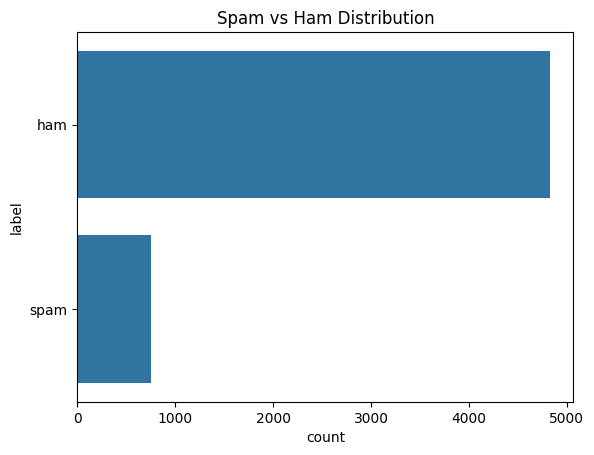

In [8]:
# Check label distribution
sns.countplot(data['label'])
plt.title("Spam vs Ham Distribution")
plt.show()


In [10]:
 #Convert 'spam' and 'ham' to binary (spam = 1, ham = 0)
data['label'] = data['label'].map({'spam': 1, 'ham': 0})

In [11]:
# Handle missing values in 'mail' column (if any)
data['mail'].fillna('', inplace=True)

<ipython-input-11-658f22be6bba>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['mail'].fillna('', inplace=True)


In [12]:
# Use CountVectorizer to transform email text into numerical features
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['mail'])  # Transform emails into numerical data

In [13]:
# Target labels
y = data['label']

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# Initialize Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

In [15]:
# Train the model
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
# Make predictions on the test set
y_pred = rfc.predict(X_test)

In [17]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 98.12%


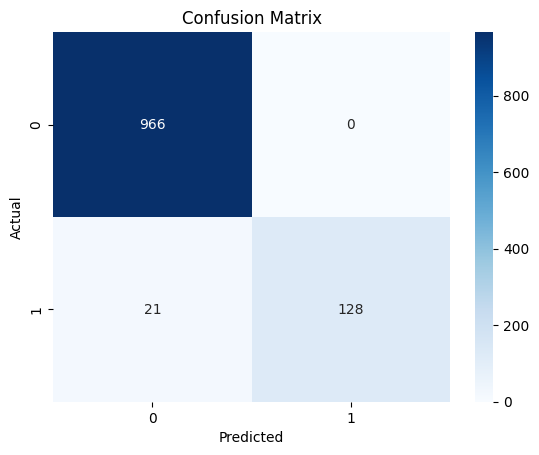

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.86      0.92       149

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [18]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))